In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [2]:
data_dir = '/Users/ec270266/Documents/Phd/Euclid/dev/feature-sed-pred/sed_spectral_classification/output/psf_dataset/'
wf_psf_dir = '/Users/ec270266/Documents/Phd/Euclid/dev/wf-psf/'

# SED folder path
SED_path = wf_psf_dir+'data/SEDs/save_SEDs/'
SEDs = np.load(SED_path + 'SEDs.npy', allow_pickle=True)[()]

# Load the datasets
# dataset = np.load(data_dir + 'train_10000_stars_id_001_8bins.npy', allow_pickle=True)[()]
dataset = np.load(data_dir + 'train_12000_stars_id_002_8bins.npy', allow_pickle=True)[()]


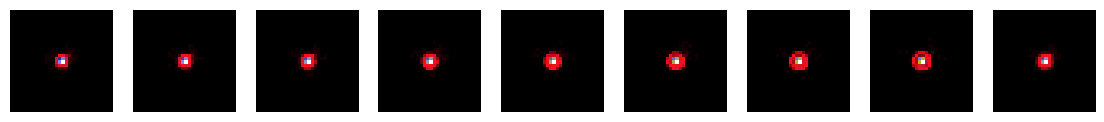

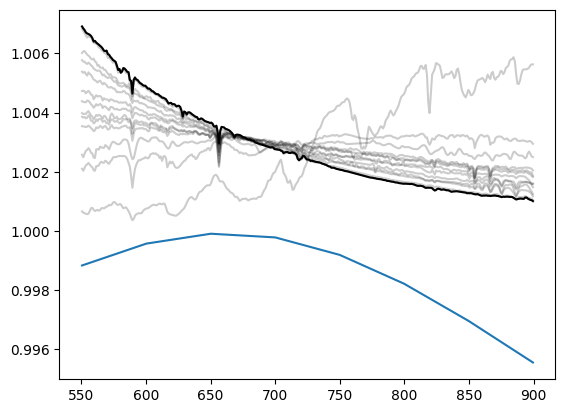

In [3]:
idx = 1
# plot monoc psfs and the poly psf
im, ax = plt.subplots(1, dataset['parameters']['n_bins']+1, figsize=(14, 7))

for i in range(dataset['parameters']['n_bins']):
    ax[i].imshow(dataset['mono_psfs'][idx,i], cmap='gist_stern')
    ax[i].axis('off')

ax[-1].imshow(dataset['stars'][idx], cmap='gist_stern')
ax[-1].axis('off')
plt.show()

# Plot the difference between the mono and poly psfs
lambdas = np.linspace(dataset['SEDs'][idx][0,0], dataset['SEDs'][idx][-1,0], dataset['parameters']['n_bins'])
diff = np.array([np.sum((mono_psf-dataset['stars'][idx])**2) for mono_psf in dataset['mono_psfs'][idx]])
plt.plot(lambdas,1-diff)
# Load and plot all the SEDs
SEDs = np.load(SED_path + 'SEDs.npy', allow_pickle=True)[()]
for sed in SEDs:
    plt.plot(dataset['SEDs'][idx][:,0], 1+sed, 'k', alpha=0.2)
# Plot the SED
plt.plot(dataset['SEDs'][idx][:,0], 1+dataset['SEDs'][idx][:,1], 'k')

plt.show()

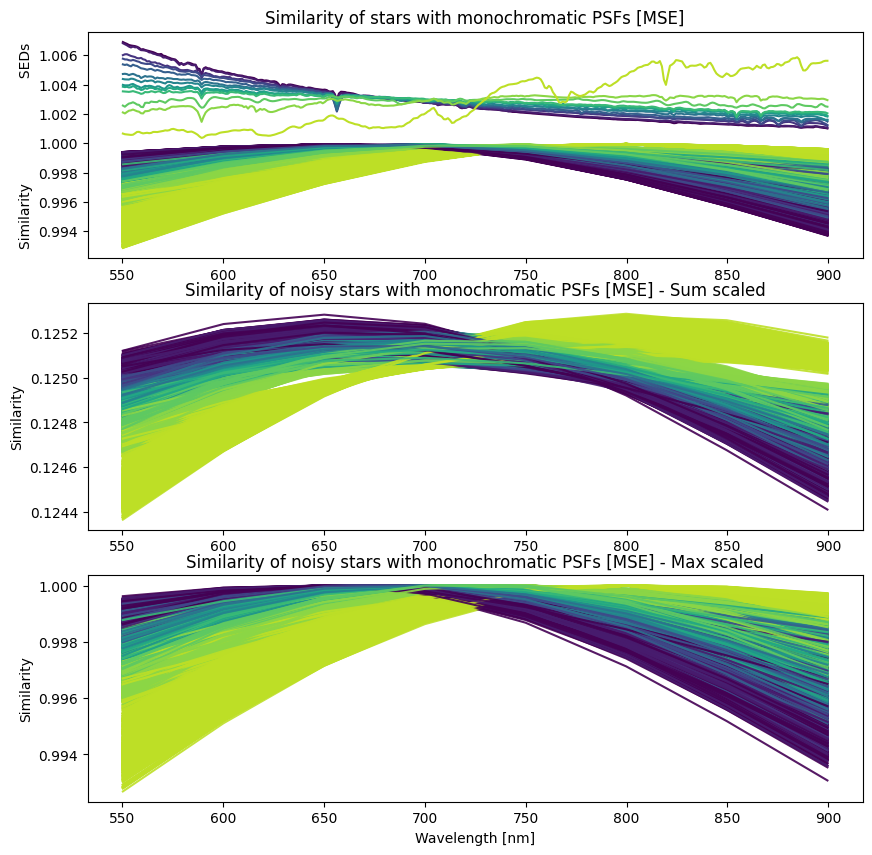

In [4]:
# Define 13 color palette
color_palette = plt.cm.viridis(np.linspace(0, 0.9, 13))

# Plot the difference with color code
fig, ax = plt.subplots(3,1,figsize=(10, 10))

for i in range(dataset['parameters']['n_stars']):
    diff = np.array([np.sum((mono_psf-dataset['stars'][i])**2) for mono_psf in dataset['mono_psfs'][i]])
    ax[0].plot(lambdas,1-diff, color=color_palette[dataset['SED_ids'][i]], alpha=0.9)
# Plot the SEDs
for i in range(13):
    ax[0].plot(dataset['SEDs'][0][:,0], 1+SEDs[i], color=color_palette[i])
# Plot similarity with the noisy stars
for i in range(dataset['parameters']['n_stars']):
    diff = np.array([np.sum((mono_psf-dataset['noisy_stars'][i])**2) for mono_psf in dataset['mono_psfs'][i]])
    ax[1].plot(lambdas,(1-diff)/np.sum(1-diff), color=color_palette[dataset['SED_ids'][i]], alpha=0.9)
# Plot normalised similarity with the noisy stars
for i in range(dataset['parameters']['n_stars']):
    diff = np.array([np.sum((mono_psf-dataset['noisy_stars'][i])**2) for mono_psf in dataset['mono_psfs'][i]])
    ax[2].plot(lambdas,(1-diff)/np.max(1-diff), color=color_palette[dataset['SED_ids'][i]], alpha=0.9)
ax[0].set_title('Similarity of stars with monochromatic PSFs [MSE]')
ax[1].set_title('Similarity of noisy stars with monochromatic PSFs [MSE] - Sum scaled')
ax[2].set_title('Similarity of noisy stars with monochromatic PSFs [MSE] - Max scaled')
ax[2].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('Similarity                        SEDs')
ax[1].set_ylabel('Similarity')
ax[2].set_ylabel('Similarity')
plt.show()

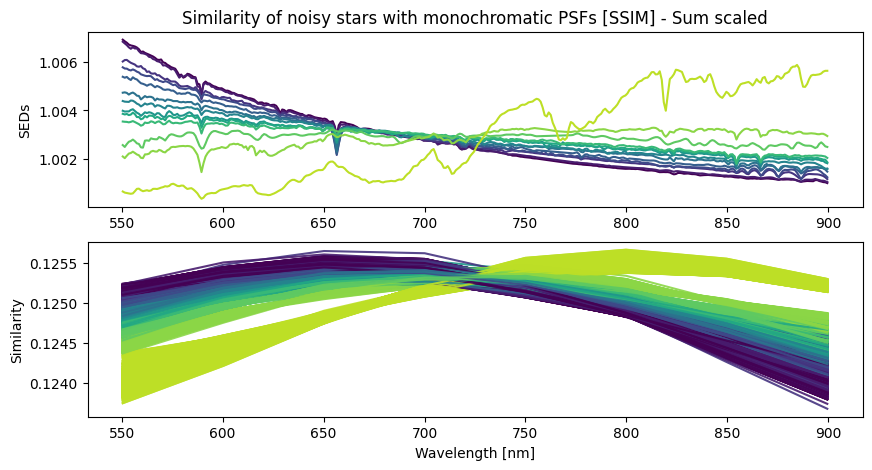

In [5]:
# Plot the difference with color code
fig, ax = plt.subplots(2,1,figsize=(10, 5))

for i in range(dataset['parameters']['n_stars']):
    simil = np.array([ssim(mono_psf,dataset['stars'][i], data_range=0.2) for mono_psf in dataset['mono_psfs'][i]])
    ax[1].plot(lambdas,simil/np.sum(simil), color=color_palette[dataset['SED_ids'][i]], alpha=0.9)
# ax.set_ylim(0.985,1.008)
# Plot the SEDs
for i in range(13):
    ax[0].plot(dataset['SEDs'][0][:,0], 1+SEDs[i], color=color_palette[i])
# Plot similarity with the noisy stars
# for i in range(dataset['parameters']['n_stars']):
#     simil = np.array([ssim(mono_psf,dataset['noisy_stars'][i], data_range=0.2) for mono_psf in dataset['mono_psfs'][i]])
#     ax[1].plot(lambdas,simil/np.sum(simil), color=color_palette[dataset['SED_ids'][i]], alpha=0.9)
ax[0].set_title('Similarity of noisy stars with monochromatic PSFs [SSIM] - Sum scaled')
ax[1].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('SEDs')
ax[1].set_ylabel('Similarity')
plt.show()

# Poster figures: data analysis

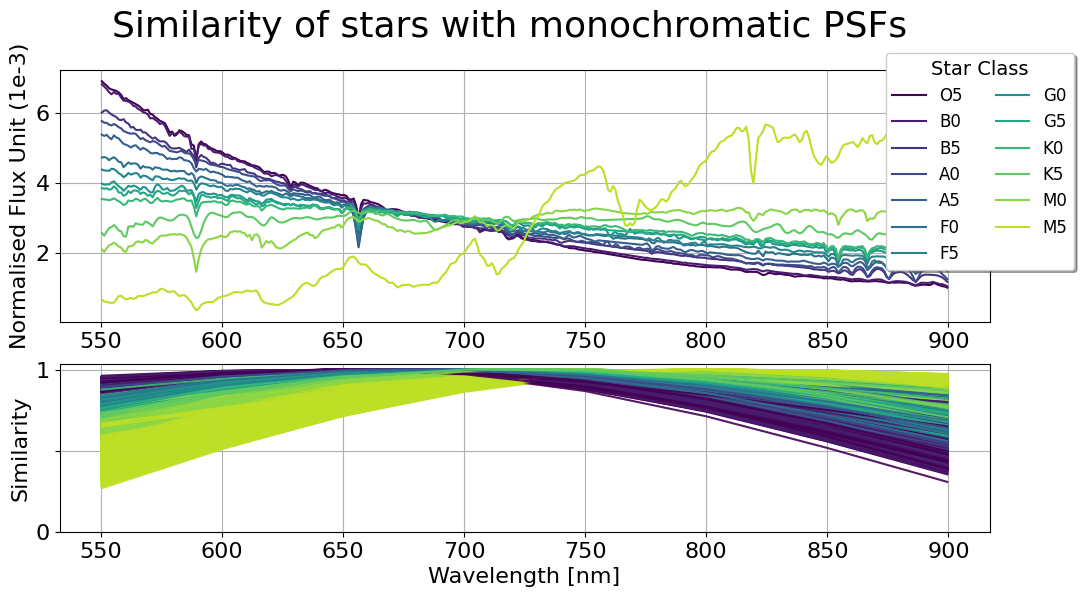

In [6]:
star_class_labels = ['O5','B0','B5','A0','A5','F0','F5','G0','G5','K0','K5','M0','M5']
# Define plot font size
plt.rcParams.update({'font.size': 16})
# Define 13 color palette
color_palette = plt.cm.viridis(np.linspace(0, 0.9, 13))

fig, ax = plt.subplots(2,1, figsize=(12,6), height_ratios=[6, 4])
# Plot the SEDs
for i in range(13):
    ax[0].plot(dataset['SEDs'][0][:,0], SEDs[i], color=color_palette[i], label=star_class_labels[i])
ax[0].legend(loc='upper right',  ncol=2, fontsize=12, title='Star Class', title_fontsize='14', shadow=True, fancybox=True, bbox_to_anchor=(1.1, 1.1))
ax[0].grid()
ax[0].set_ylabel('Normalised Flux Unit (1e-3)')
ax[0].set_yticks([0.002, 0.004, 0.006], ['2', '4', '6'])

# Plot normalised similarity with the noisy stars
for i in range(dataset['parameters']['n_stars']):
    diff = np.array([np.sum((mono_psf-dataset['noisy_stars'][i])**2) for mono_psf in dataset['mono_psfs'][i]])
    ax[1].plot(lambdas,(1-diff)/np.max(1-diff), color=color_palette[dataset['SED_ids'][i]], alpha=0.9)
plt.suptitle('Similarity of stars with monochromatic PSFs', fontsize=26)
ax[1].set_ylabel('Similarity')
ax[1].set_xlabel('Wavelength [nm]')
ax[1].grid()
ax[1].set_yticks([0.99, 0.995, 1], ['0', '', '1'])
# plt.show()
plt.savefig('../figures/similarity_seds.pdf')

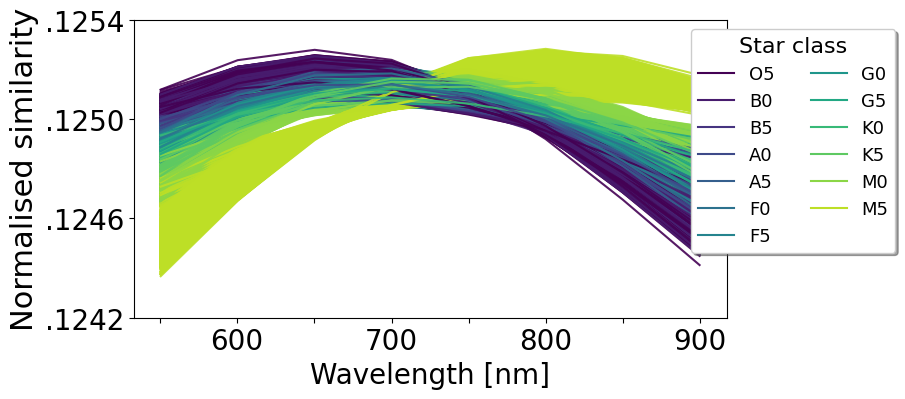

In [7]:
plt.rcParams.update({'font.size': 20})
# Plot normalised similarity with the noisy stars
plt.figure(figsize=(10,4.4))

# Plot the SEDs
for i in range(13):
    plt.plot([], [], color=color_palette[i], label=star_class_labels[i])
# plt.legend(loc='upper right',  ncol=2, fontsize=14, title='Star Class', title_fontsize='18', shadow=True, fancybox=True, bbox_to_anchor=(1.5, 1))
plt.legend(loc= 'upper right',  ncol=2, fontsize=13, title='Star class', title_fontsize='16', shadow=True, fancybox=True, bbox_to_anchor=(1.3, 1))


for i in range(dataset['parameters']['n_stars']):
    diff = np.array([np.sum((mono_psf-dataset['noisy_stars'][i])**2) for mono_psf in dataset['mono_psfs'][i]])
    plt.plot(lambdas,(1-diff)/np.sum(1-diff) ,color=color_palette[dataset['SED_ids'][i]], alpha=0.9,)
# plt.suptitle('Similarity features', fontsize=26)
plt.ylabel('Normalised similarity', fontsize=22)
plt.xlabel('Wavelength [nm]')
# plt.grid()
plt.yticks([0.1242, 0.1246, 0.1250, 0.1254], ['.1242', '.1246', '.1250', '.1254'])
plt.xticks([550, 600, 650, 700, 750, 800, 850, 900], ['', '600', '', '700', '', '800', '', '900'])
plt.tight_layout()
plt.savefig('../figures/similarity_features.pdf')


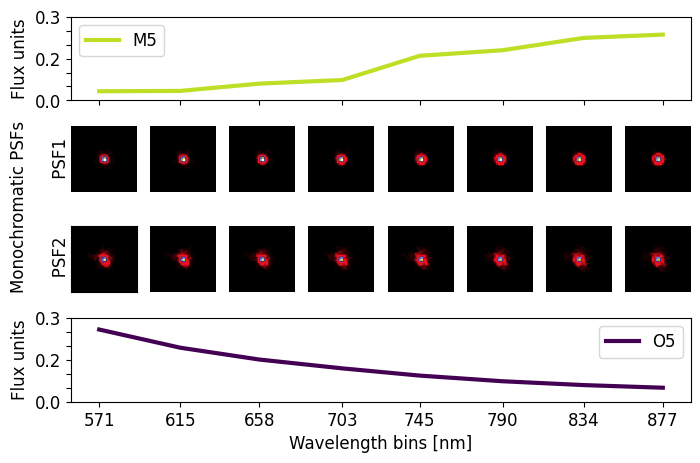

In [8]:
# Define plot font size
plt.rcParams.update({'font.size': 12})

idx = np.random.randint(0, dataset['parameters']['n_stars'])
# idx = 9289
# idx = 3870
idx = 8917
idx_2 = np.random.randint(0, dataset['parameters']['n_stars'])
# idx_2 = 4927
idx_2 = 8254

plt.figure(figsize=(8, 5))
plt.subplot(4,1,1)
# plt.title('SED and PSF degeneracy', fontsize=18)
plt.plot(np.round(dataset['packed_SEDs'][0,1,:]*1e3),
         dataset['packed_SEDs'][dataset['SED_ids'][idx]][2,:], 
         label=star_class_labels[dataset['SED_ids'][idx]],
         color=color_palette[-1], linewidth=3)
plt.legend()
plt.xticks(np.round(dataset['packed_SEDs'][0,1,:]*1e3), [])
# plt.yticks([0, .05, .1, .15, .2],['0.0', '', .1, '', .2])
plt.yticks([0, .05, .10, .15, .20, .25, .3],['0.0', '','', .2, '','', .3])
plt.ylabel('Flux units')
# plt.grid()

for i, j in enumerate([0,1,2,3,4,5,6,7]):
    plt.subplot(4,8,i+9)
    plt.imshow(dataset['mono_psfs'][idx,j], cmap='gist_stern', vmax=.2, vmin=0)
    plt.axis('off')
    plt.subplot(4,8,i+17)
    plt.imshow(dataset['mono_psfs'][idx_2,j], cmap='gist_stern', vmax=.2, vmin=0)
    plt.axis('off')
    if i==0 or i==8:
        plt.axis('on')
        plt.xticks([], [])
        plt.yticks([], []) 
        plt.ylabel('Monochromatic PSFs\n\n   PSF2           PSF1', loc='bottom', labelpad=1)
# plt.subplot(4,6,12)
# plt.imshow(dataset['stars'][idx], cmap='gist_stern')
# plt.axis('off')
# plt.subplot(4,6,18)
# plt.imshow(dataset['stars'][idx_2], cmap='gist_stern')
# plt.axis('off')

plt.subplot(4,1,4)
plt.plot(np.round(dataset['packed_SEDs'][0,1,:]*1e3),
         dataset['packed_SEDs'][dataset['SED_ids'][idx_2]][2,:], 
         label=star_class_labels[dataset['SED_ids'][idx_2]],
         color=color_palette[0], linewidth=3)
plt.legend()
plt.xticks(np.round(dataset['packed_SEDs'][0,1,:]*1e3))
# plt.yticks([0, .05, .1, .15, .2],['0.0', '', .1, '', .2])
plt.yticks([0, .05, .10, .15, .20, .25, .3],['0.0', '','', .2, '','', .3])

plt.xlabel('Wavelength bins [nm]')
plt.ylabel('Flux units')
# plt.grid()

# plt.show()
plt.savefig('../figures/SEDs_mono_psfs.pdf')

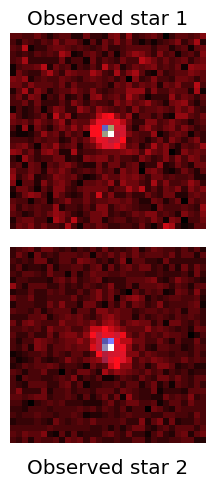

In [9]:
# Plot the stars
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(3, 5))
plt.subplot(2,1,1)
plt.imshow(dataset['noisy_stars'][idx], cmap='gist_stern')
plt.axis('off')
plt.title('Observed star 1')
plt.subplot(2,1,2)
plt.imshow(dataset['noisy_stars'][idx_2], cmap='gist_stern')
plt.axis('off')
# put the title at the bottom of the plot
plt.title('Observed star 2', y=-0.2)

plt.tight_layout()
plt.savefig('../figures/observed_degeneracy_stars.pdf')

In [10]:
idx_2

8254

Text(0, 0.5, 'Flux units')

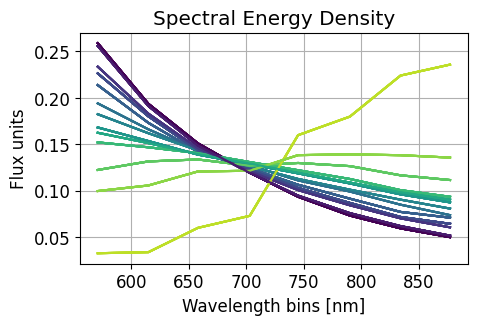

In [11]:
plt.figure(figsize=(5, 3))
for i in range(100):
    plt.plot(np.round(dataset['packed_SEDs'][0,1,:]*1e3), dataset['packed_SEDs'][dataset['SED_ids'][i]][2,:], color=color_palette[dataset['SED_ids'][i]])
plt.grid()
plt.title(r'Spectral Energy Density')
plt.xlabel('Wavelength bins [nm]')
plt.ylabel('Flux units')

# plt.plot(np.round(dataset['packed_SEDs'][0,1,:]*1e3),
#          dataset['packed_SEDs'][dataset['SED_ids'][idx]][2,:], 
#          label=star_class_labels[dataset['SED_ids'][idx]],
#          color=color_palette[-1], linewidth=3)